# Indoor Temperature

## 1. Introduction

In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [197]:
df = pd.read_csv("indoor-temperature-data.csv")
df.head()

,t,timedate,Ph,YTi,VAHU,TAHU,Ta,Ps,Vw,YTi_FF
0,1,2023-07-01 00:00:00,0.017944,19.495,0.0,24.059999,17.7,1,0.0,19.5525
1,2,2023-07-01 00:10:00,0.012085,19.415,0.0,24.059999,17.7,1,0.0,19.6425
2,3,2023-07-01 00:20:00,0.017944,19.375,0.0,24.059999,17.8,1,0.0,19.6325
3,4,2023-07-01 00:30:00,0.012085,19.395,0.0,24.059999,17.8,1,0.0,19.3250
4,5,2023-07-01 00:40:00,0.024170,19.505,0.0,24.120000,17.9,1,0.0,19.4400


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13248 entries, 0 to 13247
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   t         13248 non-null  int64  
 1   timedate  13248 non-null  object 
 2   Ph        13247 non-null  float64
 3   YTi       13247 non-null  float64
 4   VAHU      13247 non-null  float64
 5   TAHU      13247 non-null  float64
 6   Ta        13248 non-null  float64
 7   Ps        13248 non-null  int64  
 8   Vw        13248 non-null  float64
 9   YTi_FF    13247 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 1.0+ MB


### Drop Unused Columns

In [199]:
df = df.drop(['t','timedate','Ph','Vw'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13248 entries, 0 to 13247
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YTi     13247 non-null  float64
 1   VAHU    13247 non-null  float64
 2   TAHU    13247 non-null  float64
 3   Ta      13248 non-null  float64
 4   Ps      13248 non-null  int64  
 5   YTi_FF  13247 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 621.1 KB


### Missing Values

In [200]:
df.isnull().sum()

YTi       1
VAHU      1
TAHU      1
Ta        0
Ps        0
YTi_FF    1
dtype: int64

### Removing Missing Vlaues

In [201]:
df = df.dropna()

### Check for Missing Values again

In [202]:
df.isnull().sum()

YTi       0
VAHU      0
TAHU      0
Ta        0
Ps        0
YTi_FF    0
dtype: int64

### Check For Duplicated Values

In [203]:
df.duplicated().sum()


np.int64(0)

### Get X Coloumns Dataset

In [204]:
X = df[['VAHU', 'TAHU', 'Ta', 'Ps', 'YTi_FF']]
X

,VAHU,TAHU,Ta,Ps,YTi_FF
0,0.0,24.059999,17.7,1,19.552500
1,0.0,24.059999,17.7,1,19.642500
2,0.0,24.059999,17.8,1,19.632500
3,0.0,24.059999,17.8,1,19.325000
4,0.0,24.120000,17.9,1,19.440000
...,...,...,...,...,...
13243,0.0,22.809999,15.9,1,21.175000
13244,0.0,22.809999,15.9,1,21.252500
13245,0.0,22.809999,16.0,2,21.260000
13246,0.0,22.809999,16.1,1,21.145000


### Get X columns Datasets As numpy 2D Matrix

In [205]:
X = X.values
X

array([[ 0.        , 24.05999947, 17.7       ,  1.        , 19.55249977],
       [ 0.        , 24.05999947, 17.7       ,  1.        , 19.64249992],
       [ 0.        , 24.05999947, 17.8       ,  1.        , 19.63249969],
       ...,
       [ 0.        , 22.80999947, 16.        ,  2.        , 21.26000023],
       [ 0.        , 22.80999947, 16.1       ,  1.        , 21.1449995 ],
       [ 0.        , 22.80999947, 16.2       ,  1.        , 21.17999935]])

### Get y columns Datasets 

In [206]:
y = df['YTi']
y

0        19.4950
1        19.4150
2        19.3750
3        19.3950
4        19.5050
          ...   
13243    20.7875
13244    20.7200
13245    20.6975
13246    20.7175
13247    20.7100
Name: YTi, Length: 13247, dtype: float64

### Get y columns Datasets As numpy 2D Matrix

In [207]:
y = y.values
y

array([19.49499989, 19.41499996, 19.375     , ..., 20.69750023,
       20.71749973, 20.71000004])

In [208]:
y = y.reshape(-1,1)
y

array([[19.49499989],
       [19.41499996],
       [19.375     ],
       ...,
       [20.69750023],
       [20.71749973],
       [20.71000004]])

# 2. EDA

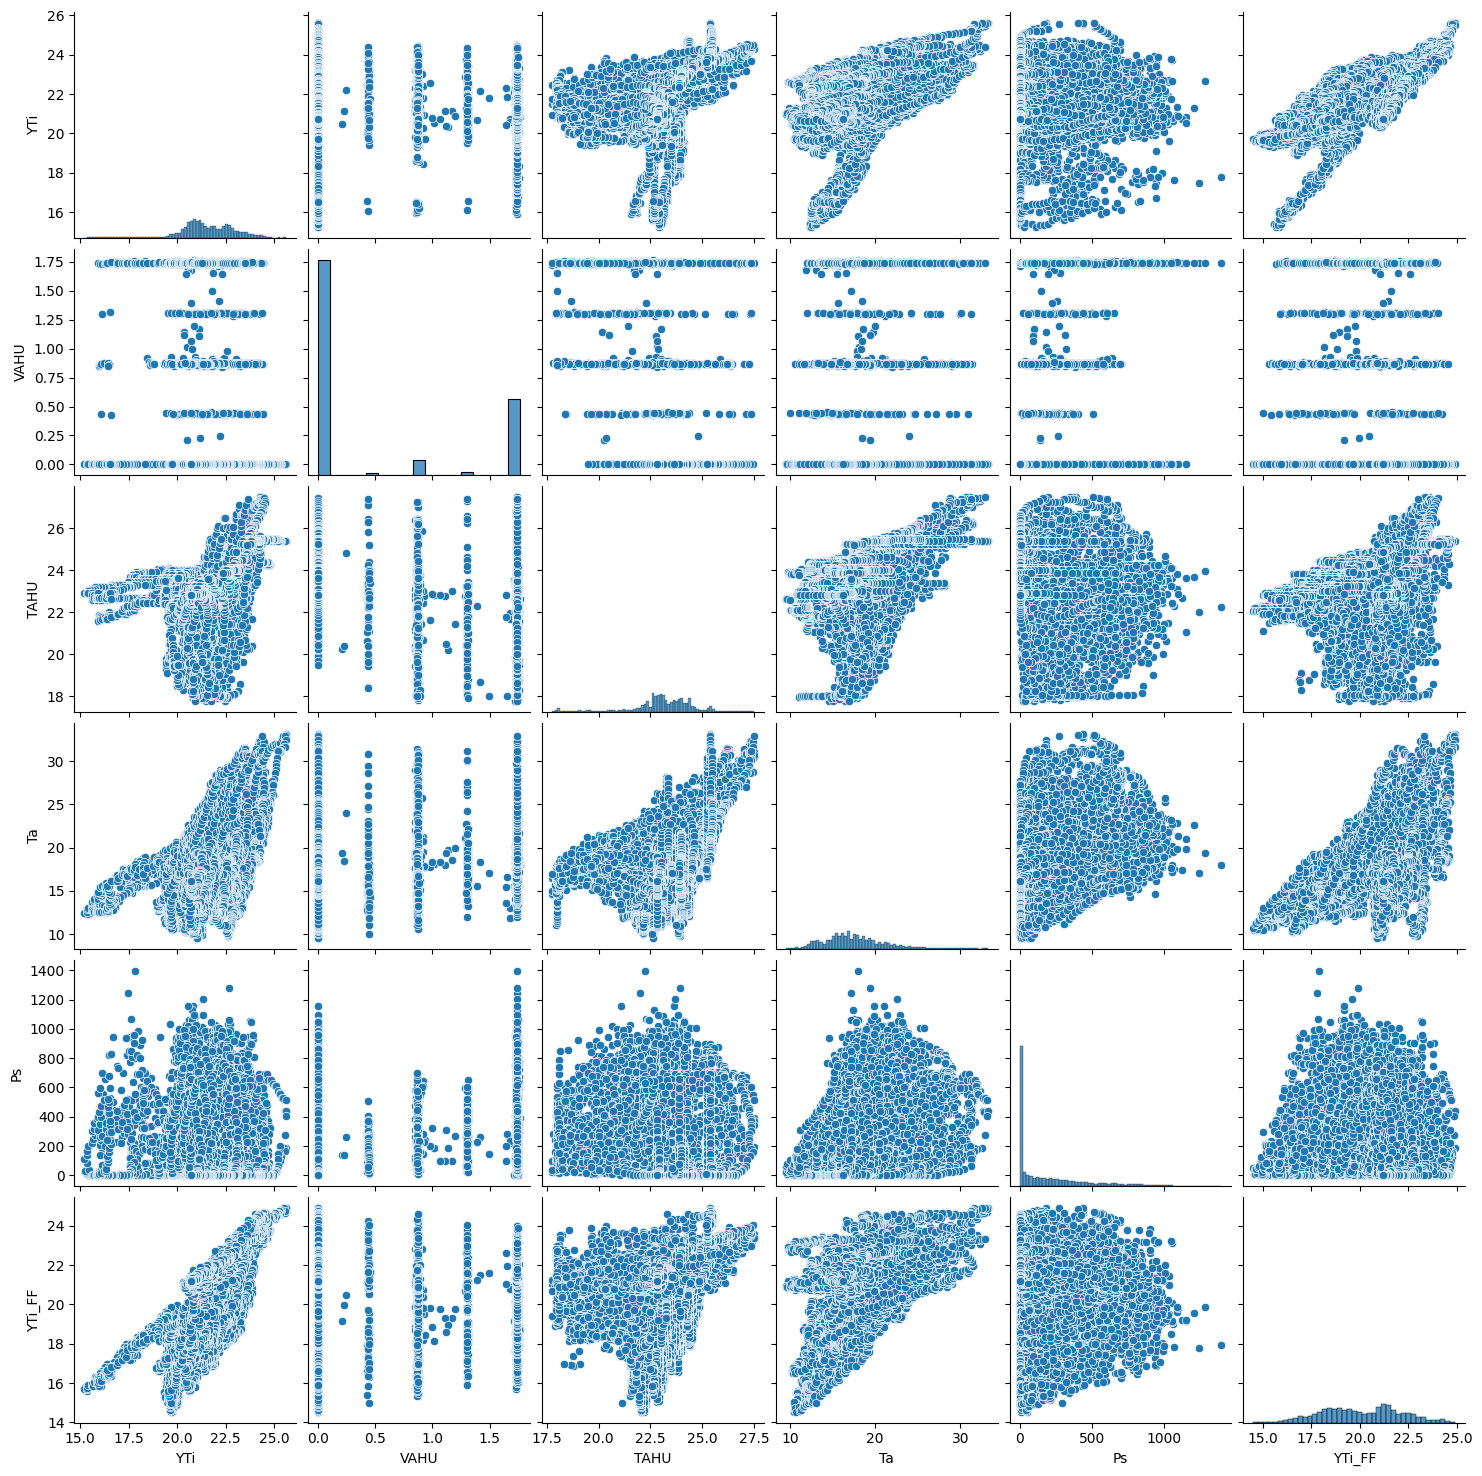

In [209]:
sns.pairplot(df)
# plt.show()

**Conclusion:**
* YTi/YTi_FF grow together
* Ta/YTi_FF grow together
* Ta/YTi grow together
* Ta/TAHU grow together

In [210]:
corr_matrix = df.corr()
corr_matrix

,YTi,VAHU,TAHU,Ta,Ps,YTi_FF
YTi,1.000000,-0.065456,0.402375,0.511632,-0.010025,0.757994
VAHU,-0.065456,1.000000,-0.497655,0.296721,0.582957,0.046993
TAHU,0.402375,-0.497655,1.000000,0.305753,-0.162560,0.238613
Ta,0.511632,0.296721,0.305753,1.000000,0.462817,0.557076
Ps,-0.010025,0.582957,-0.162560,0.462817,1.000000,0.050557
YTi_FF,0.757994,0.046993,0.238613,0.557076,0.050557,1.000000


<Axes: >

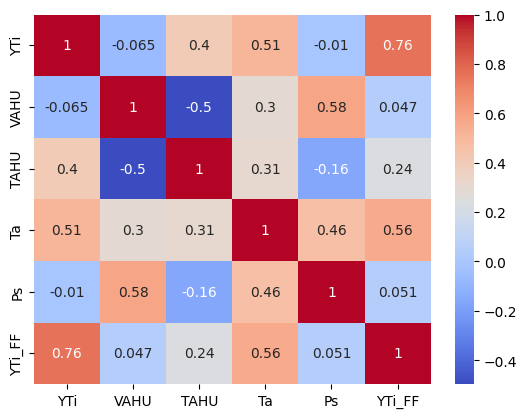

In [211]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

**Conclusion:**
* YTi/YTi_FF grow together strongly
* Ta/YTi_FF grow together
* Ta/YTi grow together
* Ta/TAHU grow together moderately
* TAHU/YTi grow together
* TAHU/VAHU grow oppositely
* Ta/VAHU grow together moderately
* Ps/VAHU grow together

In [212]:
df['Quantile_Group'] = pd.qcut(
    df['VAHU'],
    q=4,
    labels=['Off', 'On'],
    duplicates='drop'
)
df[345:]

,YTi,VAHU,TAHU,Ta,Ps,YTi_FF,Quantile_Group
345,16.490001,1.7445,21.870000,16.0,394,16.540000,On
346,16.352500,1.7350,21.809999,15.9,333,16.542500,On
347,16.299999,1.7325,21.745000,15.4,197,16.397500,On
348,16.352500,1.7360,21.680000,15.2,318,16.514999,On
349,16.305000,1.7350,21.680000,15.3,359,16.634999,On
...,...,...,...,...,...,...,...
13243,20.787500,0.0000,22.809999,15.9,1,21.175000,Off
13244,20.720000,0.0000,22.809999,15.9,1,21.252500,Off
13245,20.697500,0.0000,22.809999,16.0,2,21.260000,Off
13246,20.717500,0.0000,22.809999,16.1,1,21.145000,Off


<Axes: xlabel='Quantile_Group', ylabel='TAHU'>

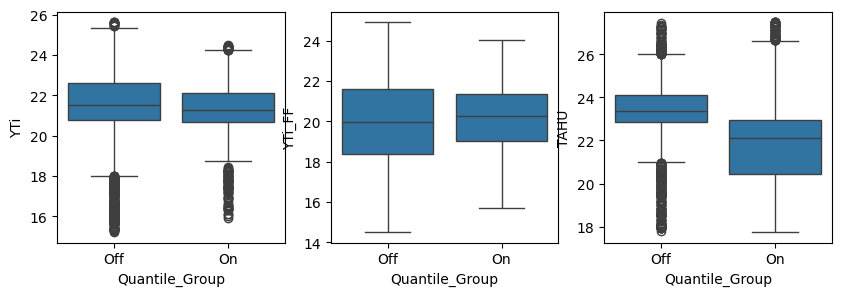

In [222]:
plt.subplots(ncols=3,nrows=1, figsize=(10, 3))

plt.subplot(1,3, 1)
sns.boxplot(y=df['YTi'], x=df['Quantile_Group'])

plt.subplot(1,3, 2)
sns.boxplot(y=df['YTi_FF'], x=df['Quantile_Group'])

plt.subplot(1,3, 3)
sns.boxplot(y=df['TAHU'], x=df['Quantile_Group'])



**Conclusion:**
* AC is more efficient on the ground floor

In [214]:
df['Quantile_Group_Ps'] = pd.qcut(
    df['Ps'],
    q=5,
    labels=['VL', 'L', 'M', 'H', 'VH'],
    duplicates='drop'
)
df[345:]

,YTi,VAHU,TAHU,Ta,Ps,YTi_FF,Quantile_Group,Quantile_Group_Ps
345,16.490001,1.7445,21.870000,16.0,394,16.540000,On,VH
346,16.352500,1.7350,21.809999,15.9,333,16.542500,On,H
347,16.299999,1.7325,21.745000,15.4,197,16.397500,On,H
348,16.352500,1.7360,21.680000,15.2,318,16.514999,On,H
349,16.305000,1.7350,21.680000,15.3,359,16.634999,On,VH
...,...,...,...,...,...,...,...,...
13243,20.787500,0.0000,22.809999,15.9,1,21.175000,Off,VL
13244,20.720000,0.0000,22.809999,15.9,1,21.252500,Off,VL
13245,20.697500,0.0000,22.809999,16.0,2,21.260000,Off,L
13246,20.717500,0.0000,22.809999,16.1,1,21.145000,Off,VL


<Axes: xlabel='Quantile_Group_Ps', ylabel='TAHU'>

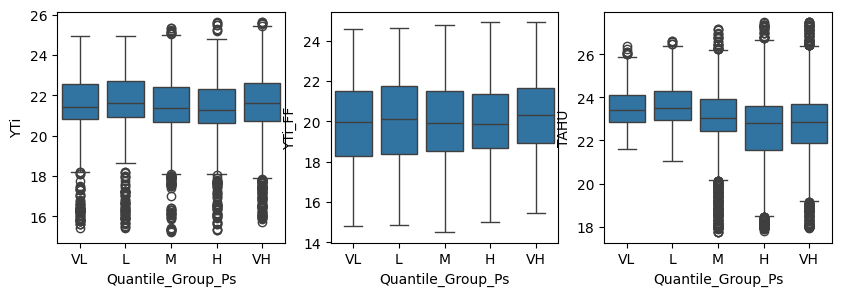

In [221]:
plt.subplots(ncols=3,nrows=1, figsize=(10, 3))

plt.subplot(1,3, 1)
sns.boxplot(y=df['YTi'], x=df['Quantile_Group_Ps'])

plt.subplot(1,3, 2)
sns.boxplot(y=df['YTi_FF'], x=df['Quantile_Group_Ps'])

plt.subplot(1,3, 3)
sns.boxplot(y=df['TAHU'], x=df['Quantile_Group_Ps'])


**Conclusion**
* Solar Radiation does not affect the various temperatures too much
    * likley thanks to the AC being turned On

In [216]:
df['Quantile_Group_Ta'] = pd.qcut(
    df['Ta'],
    q=5,
    labels=['VL', 'L', 'M', 'H', 'VH'],
    duplicates='drop'
)
df[345:]

,YTi,VAHU,TAHU,Ta,Ps,YTi_FF,Quantile_Group,Quantile_Group_Ps,Quantile_Group_Ta
345,16.490001,1.7445,21.870000,16.0,394,16.540000,On,VH,L
346,16.352500,1.7350,21.809999,15.9,333,16.542500,On,H,L
347,16.299999,1.7325,21.745000,15.4,197,16.397500,On,H,L
348,16.352500,1.7360,21.680000,15.2,318,16.514999,On,H,L
349,16.305000,1.7350,21.680000,15.3,359,16.634999,On,VH,L
...,...,...,...,...,...,...,...,...,...
13243,20.787500,0.0000,22.809999,15.9,1,21.175000,Off,VL,L
13244,20.720000,0.0000,22.809999,15.9,1,21.252500,Off,VL,L
13245,20.697500,0.0000,22.809999,16.0,2,21.260000,Off,L,L
13246,20.717500,0.0000,22.809999,16.1,1,21.145000,Off,VL,L


<Axes: xlabel='Quantile_Group_Ta', ylabel='TAHU'>

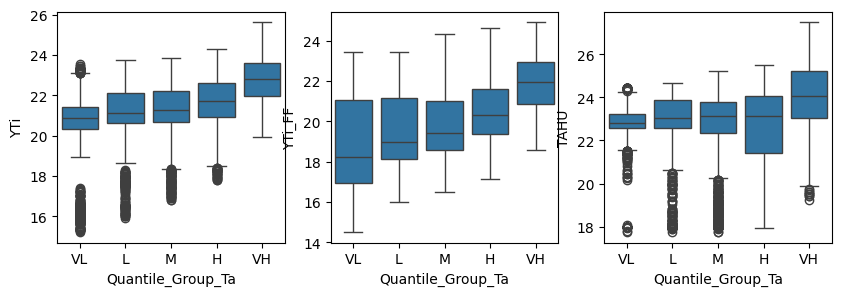

In [220]:
plt.subplots(ncols=3,nrows=1, figsize=(10, 3))

plt.subplot(1,3, 1)
sns.boxplot(y=df['YTi'], x=df['Quantile_Group_Ta'])

plt.subplot(1,3, 2)
sns.boxplot(y=df['YTi_FF'], x=df['Quantile_Group_Ta'])

plt.subplot(1,3, 3)
sns.boxplot(y=df['TAHU'], x=df['Quantile_Group_Ta'])

**Conclusion**
* Ambiant outside temperature affect widely the various temperatures
* The medium to low temperature are likely when the AC is off
    * many more outliers and wider temperature ranges
* the high to very hight temperature are likely whent he AC is ON
    * less to no outliers and more under control temperature ranges


# 3 Feature Enginnering

# 4 Regression